# Getting Global Warming Rates

Easier to do this with xarray than in R. Objective is simple, process full global timeline to table of global temperature and anomalies. Use that table to get global warming rates for the temperature report.

In [16]:
# Libraries
import requests
from bs4 import BeautifulSoup
import os
import xarray as xr
import datetime
import numpy as np
import pandas as pd


# Set Notebook Options:
workspace = "local"
reference_period = "1982-2011"

# Root paths
root_locations = {"local" : "/Users/akemberling/Box/",
                  "docker" : "/Users/akemberling/Box/"}

# Set the workspace - local/ docker
box_root = root_locations[workspace]


# Set climatology source choices
climatologies = {"1982-2011" : "1982to2011_climatology",
                 "1991-2020" : "1991to2020_climatology"}

climate_period = climatologies[reference_period]

# document what choices were made on last run:
print(f"Working via {workspace} directory at: {box_root}")
print(f"Calculating Anomalies for {reference_period} reference period using {climate_period}")

Working via local directory at: /Users/akemberling/Box/
Calculating Anomalies for 1982-2011 reference period using 1982to2011_climatology


## Load Global OISST Anomalies

In [17]:
# Get file names
anom_direct = f"OISST/oisst_mainstays/annual_anomalies/{climate_period}/"
anom_files = []
for file in os.listdir(anom_direct):
    full_path = f"{anom_direct}{file}"
    anom_files.append(full_path)

# open the collection
oisst_anomalies = xr.open_mfdataset(anom_files, combine = "by_coords")
oisst_anomalies

<xarray.Dataset>
Dimensions:               (lat: 720, lon: 1440, time: 14431)
Coordinates:
  * lat                   (lat) float32 -89.875 -89.625 ... 89.625 89.875
  * lon                   (lon) float32 0.125 0.375 0.625 ... 359.625 359.875
  * time                  (time) datetime64[ns] 1981-09-01 ... 2021-03-05T12:00:00
    MOD                   (time) int64 dask.array<chunksize=(122,), meta=np.ndarray>
    modified_ordinal_day  (time) int64 dask.array<chunksize=(122,), meta=np.ndarray>
Data variables:
    sst                   (time, lat, lon) float32 dask.array<chunksize=(122, 720, 1440), meta=np.ndarray>

## Get Mean Time Series

Pretty simple once the data is loaded to get the mean temperature or temperature anomaly across the lat lon dimensions:

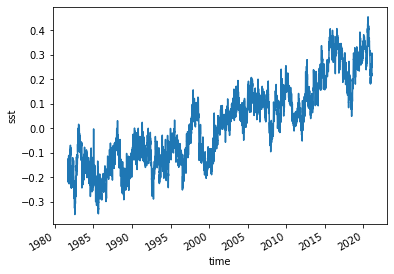

In [20]:
# Timeline for global anomalies
mean_anomalies = oisst_anomalies.mean(['lat', 'lon']) # wonderful tool to calculate spatial mean by using dim variable names
mean_anomalies.sst.plot()


In [ ]:
# Timeline for global sst
#mean_sst = oisst.mean(['lat', 'lon']) # wonderful tool to calculate spatial mean by using dim variable names

In [37]:
# convert anomalies to a dataframe from xr.array
anom_df = mean_anomalies.sst.to_dataframe()
anom_df.head()

,MOD,modified_ordinal_day,sst
time,,,
1981-09-01,245,245,-0.125744
1981-09-02,246,246,-0.137204
1981-09-03,247,247,-0.140328
1981-09-04,248,248,-0.146285
1981-09-05,249,249,-0.156617


In [38]:
# SAVING
anom_df.to_csv(f"OISST/oisst_mainstays/global_timeseries/global_anoms_1982to2011.csv")